###### Feature Information

PassengerID: Unique ID number

Survived: 0 = No, 1 = Yes

Pclass: Ticket class (1, 2, or 3)

Name: Passenger name

Sex: Male or Female

Age: Age in years

SibSp: # of siblings/spouses aboard the Titanic

Parch: # of parents/children aboard the Titanic

Ticket: Ticket #

Fare: Passenger fare

Cabin: Cabin number

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Imports

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Obtain

Load train & test data as dataframes from csv files

In [2]:
# Import training/testing data using pandas

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Scrub

In [5]:
# Combine train and test data into one dataframe

train_features = train.drop('Survived', axis=1)
df = pd.concat([train_features, test], axis=0, ignore_index=True)

In [6]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Check data types and check for any missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


One-Hot Encode 'Sex'

In [9]:
sex_dummy = pd.get_dummies(df.Sex, drop_first=True)
df = pd.concat([df, sex_dummy], axis=1)
df = df.drop('Sex', axis=1)

In [10]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
male           1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(1)
memory usage: 103.7+ KB


Fill 'Embarked' with most common label

In [12]:
df.Embarked.fillna('S', inplace=True)

One-Hot Encode 'Embarked'

In [13]:
emb_dummy = pd.get_dummies(df.Embarked, prefix='port')
df = pd.concat([df, emb_dummy], axis=1)
df = df.drop('Embarked', axis=1)

In [14]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,port_C,port_Q,port_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
male           1309 non-null uint8
port_C         1309 non-null uint8
port_Q         1309 non-null uint8
port_S         1309 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(4)
memory usage: 97.3+ KB


Fill missing 'Fare' value with 0

In [16]:
df.Fare.fillna(0, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
male           1309 non-null uint8
port_C         1309 non-null uint8
port_Q         1309 non-null uint8
port_S         1309 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(4)
memory usage: 97.3+ KB


Drop 'Cabin' feature

In [18]:
df = df.drop('Cabin', axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
male           1309 non-null uint8
port_C         1309 non-null uint8
port_Q         1309 non-null uint8
port_S         1309 non-null uint8
dtypes: float64(2), int64(4), object(2), uint8(4)
memory usage: 87.1+ KB


Drop 'Ticket' feature

In [20]:
df = df.drop('Ticket', axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
male           1309 non-null uint8
port_C         1309 non-null uint8
port_Q         1309 non-null uint8
port_S         1309 non-null uint8
dtypes: float64(2), int64(4), object(1), uint8(4)
memory usage: 76.8+ KB


Impute missing 'Age' values based on medians grouped by Pclass, male

In [22]:
grouped_df = df.groupby(by=['Pclass', 'male'], as_index=False).median()

In [23]:
grouped_df[['Pclass', 'male', 'Age']]

,Pclass,male,Age
0,1,0,36.0
1,1,1,42.0
2,2,0,28.0
3,2,1,29.5
4,3,0,22.0
5,3,1,25.0


In [24]:
def impute_age(df):
    
    df.Age.fillna(0, inplace=True)
    
    for i in range(len(df)):
        
        if df.iloc[i]['Pclass'] == 1 and df.iloc[i]['Age'] == 0:
            if df.iloc[i]['male'] == 0:
                df.set_value(i, 'Age', grouped_df.iloc[0]['Age'])
            else:
                df.set_value(i, 'Age', grouped_df.iloc[1]['Age'])
        
        elif df.iloc[i]['Pclass'] == 2 and df.iloc[i]['Age'] == 0:
            if df.iloc[i]['male'] == 0:
                df.set_value(i, 'Age', grouped_df.iloc[2]['Age'])
            else:
                df.set_value(i, 'Age', grouped_df.iloc[3]['Age'])
                
        elif df.iloc[i]['Pclass'] == 3 and df.iloc[i]['Age'] == 0:
            if df.iloc[i]['male'] == 0:
                df.set_value(i, 'Age', grouped_df.iloc[4]['Age'])
            else:
                df.set_value(i, 'Age', grouped_df.iloc[5]['Age'])

impute_age(df)

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be r

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
male           1309 non-null uint8
port_C         1309 non-null uint8
port_Q         1309 non-null uint8
port_S         1309 non-null uint8
dtypes: float64(2), int64(4), object(1), uint8(4)
memory usage: 76.8+ KB


In [26]:
df.Age.value_counts()

25.00    178
22.00    107
24.00     47
42.00     46
36.00     42
        ... 
74.00      1
24.50      1
80.00      1
23.50      1
0.67       1
Name: Age, Length: 99, dtype: int64

# Explore

In [30]:
train_data = pd.concat([df[:len(train)], train.Survived], axis=1)

In [31]:
train_data

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,male,port_C,port_Q,port_S,Survived
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0,0,1
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,0,1,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,1,0,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,0,0,0,1,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",22.0,1,2,23.4500,0,0,0,1,0
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,1,1,0,0,1


In [47]:
train_data['Died'] = 1 - train['Survived']

In [48]:
train_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,male,port_C,port_Q,port_S,Survived,Died
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0,0,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,0,1,1,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,0,1,0,1


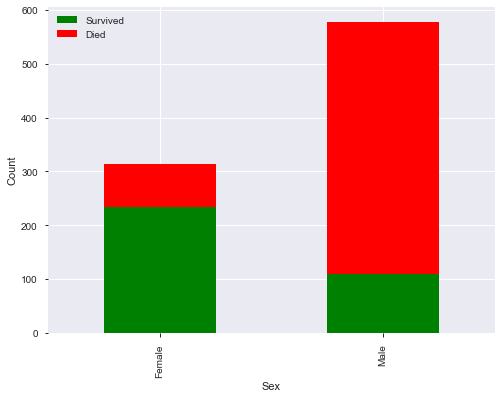

In [83]:
ax = train_data.groupby('male').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_xticklabels(['Female', 'Male']);

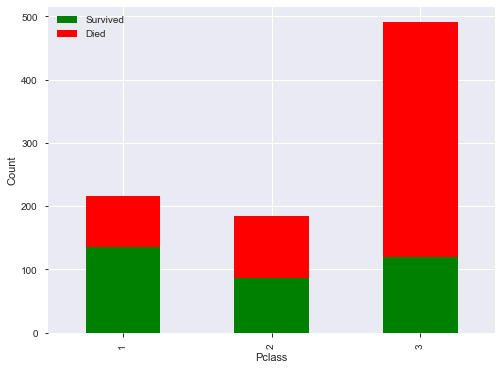

In [84]:
ax = train_data.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')
ax.set_xticklabels(['1', '2', '3']);